In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [27]:
# Load dataset
data = pd.read_csv("creditcard.csv")

In [44]:
# Basic EDA
print(f"Shape of the dataset: {data.shape}")
print(f"Missing values: {data.isnull().sum().sum()}")

# class distribution
print(f"Class distribution: {data['Class'].value_counts()}")
# print(f"Percentage: {data['Class'].value_counts(normalize=True) * 100}")

Shape of the dataset: (284807, 31)
Missing values: 0
Class distribution: Class
0    284315
1       492
Name: count, dtype: int64


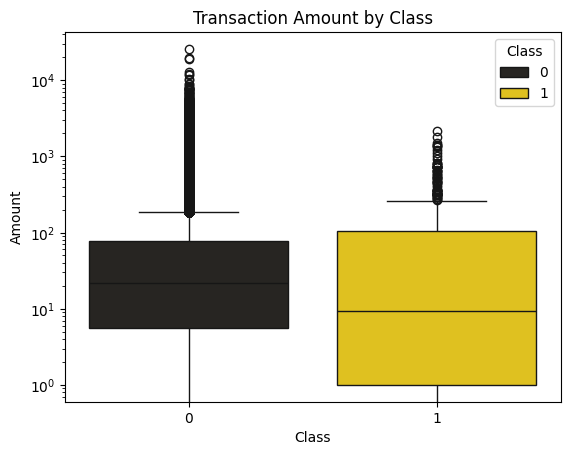

In [36]:
sns.boxplot(x='Class', y='Amount', data=data, hue='Class', palette='dark:gold')
plt.yscale('log')
plt.title("Transaction Amount by Class")
plt.show()

In [37]:
# Correlation with Class
corr_matrix = data.corr()
top_corr = corr_matrix["Class"].sort_values(ascending=False).head(10)
print("Top features correlated with fraud:\n", top_corr)

Top features correlated with fraud:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


In [ ]:
# Drop Time , scale 'Amount'
data_scaled = data.copy()
data_scaled['Amount'] = StandardScaler().fit_transform(data_scaled[['Amount']])
data_scaled = data_scaled.drop(columns=['Time'])

In [39]:
# Separate X and y
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']

In [41]:
# Balance the Dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show new class balance
print("\nAfter SMOTE:")
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())


After SMOTE:
Resampled class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [47]:
# Split test/train data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [52]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [53]:
# Random forest
randf_model = RandomForestClassifier()
randf_model.fit(X_train, y_train)
y_pred_randf = randf_model.predict(X_test)

In [ ]:
# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log, target_names=['Non-Fraud', 'Fraud']))

print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_randf
                            , target_names=["Non-Fraud", "Fraud"]))

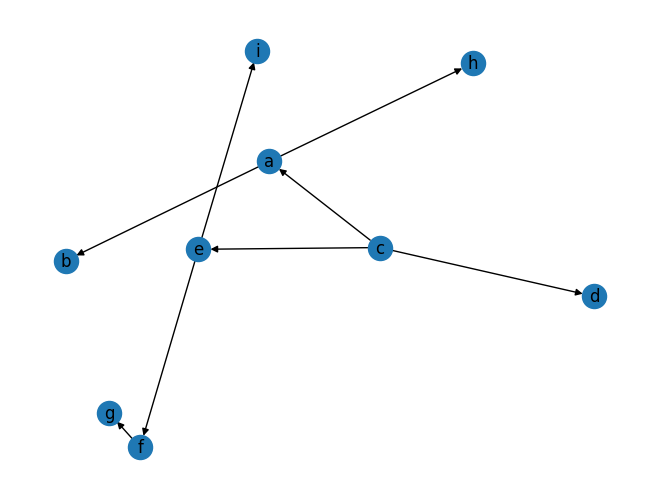

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('c', 'a'), ('c', 'd'), ('c', 'e'),
    ('a', 'b'), ('a', 'h'),
    ('e', 'f'), ('e', 'i'),
    ('f', 'g')
])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()
